In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import glob
import numpy as np
import warnings
import requests
import plotly.express as px

In [2]:
data = pd.read_csv('/kaggle/input/online-food-dataset/onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
data['Unnamed: 12'].value_counts()

Unnamed: 12
Yes    301
No      87
Name: count, dtype: int64

In [4]:
data.drop(columns=['Unnamed: 12'],inplace = True)
data.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [6]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})

/tmp/ipykernel_18/355549184.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})


In [8]:
data['Marital Status'].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [9]:
data['Marital Status'] = data['Marital Status'].replace({'Single': 1, 'Married': 2, 'Prefer not to say' : 0})

/tmp/ipykernel_18/4267809612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Marital Status'] = data['Marital Status'].replace({'Single': 1, 'Married': 2, 'Prefer not to say' : 0})


In [10]:
data['Occupation'].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [11]:
data['Occupation'] = data['Occupation'].replace({'Student': 1, 'Employee': 2, 'Self Employeed' : 0, 'House wife' : 4})

/tmp/ipykernel_18/1115859894.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Occupation'] = data['Occupation'].replace({'Student': 1, 'Employee': 2, 'Self Employeed' : 0, 'House wife' : 4})


In [12]:
data['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [13]:
data['Monthly Income'] = data['Monthly Income'].replace({'No Income': 1, 'Below Rs.10000': 2, 'More than 50000' : 0, '10001 to 25000' : 4,'25001 to 50000': 3})

/tmp/ipykernel_18/2303073134.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Monthly Income'] = data['Monthly Income'].replace({'No Income': 1, 'Below Rs.10000': 2, 'More than 50000' : 0, '10001 to 25000' : 4,'25001 to 50000': 3})


In [14]:
data.drop(columns= ['Pin code'], inplace = True)

In [15]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
0,20,0,1,1,1,Post Graduate,4,12.9766,77.5993,Yes,Positive
1,24,0,1,1,2,Graduate,3,12.9770,77.5773,Yes,Positive
2,22,1,1,1,2,Post Graduate,3,12.9551,77.6593,Yes,Negative
3,22,0,1,1,1,Graduate,6,12.9473,77.5616,Yes,Positive
4,22,1,1,1,2,Post Graduate,4,12.9850,77.5533,Yes,Positive


In [16]:
data['Educational Qualifications'].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [17]:
data['Educational Qualifications'] = data['Educational Qualifications'].replace({'Post Graduate': 1, 'Graduate': 2, 'Ph.D' : 0, 'Uneducated' : 4,'School': 3})

/tmp/ipykernel_18/3437412683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Educational Qualifications'] = data['Educational Qualifications'].replace({'Post Graduate': 1, 'Graduate': 2, 'Ph.D' : 0, 'Uneducated' : 4,'School': 3})


In [18]:
data['Output'].value_counts()

Output
Yes    301
No      87
Name: count, dtype: int64

In [19]:
data['Output'] = data['Output'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_18/174505055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Output'] = data['Output'].replace({'Yes': 1, 'No': 0})


In [20]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
0,20,0,1,1,1,1,4,12.9766,77.5993,1,Positive
1,24,0,1,1,2,2,3,12.9770,77.5773,1,Positive
2,22,1,1,1,2,1,3,12.9551,77.6593,1,Negative
3,22,0,1,1,1,2,6,12.9473,77.5616,1,Positive
4,22,1,1,1,2,1,4,12.9850,77.5533,1,Positive


In [21]:
data['Feedback'].unique()

array(['Positive', 'Negative '], dtype=object)

In [22]:
data['Feedback'] = data['Feedback'].replace({'Negative': 0}, inplace=True)

/tmp/ipykernel_18/4071104410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Feedback'] = data['Feedback'].replace({'Negative': 0}, inplace=True)


In [23]:
data.drop(columns= ['Feedback'],inplace  = True)

In [24]:
data.isna().sum() # no null values.

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Output                        0
dtype: int64

# who order more food male or female?


In [25]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output
0,20,0,1,1,1,1,4,12.9766,77.5993,1
1,24,0,1,1,2,2,3,12.9770,77.5773,1
2,22,1,1,1,2,1,3,12.9551,77.6593,1
3,22,0,1,1,1,2,6,12.9473,77.5616,1
4,22,1,1,1,2,1,4,12.9850,77.5533,1


In [26]:
male = data['Gender'].value_counts()[0]
female = data['Gender'].value_counts()[1]

In [27]:
male,female

(166, 222)

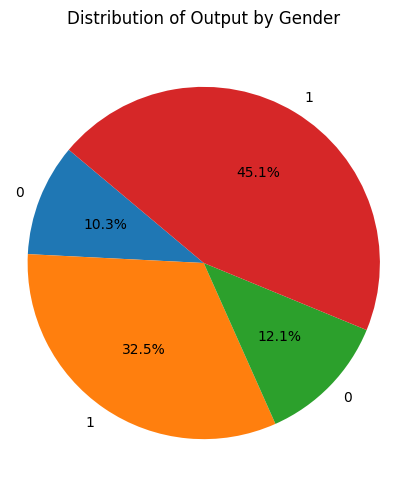

In [28]:
gender_output_counts = data.groupby(['Gender', 'Output']).size().reset_index(name='count')

plt.figure(figsize=(5, 6))
plt.pie(gender_output_counts['count'], labels=gender_output_counts['Output'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Output by Gender')
plt.axis('equal')  
plt.show()

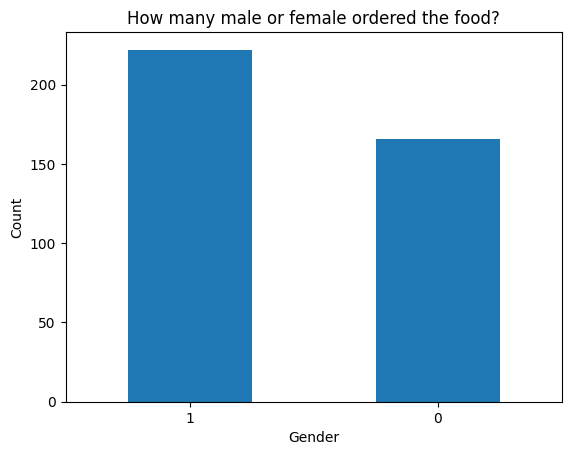

In [29]:
gender_counts = data['Gender'].value_counts()

gender_counts.plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('How many male or female ordered the food?')
plt.show()

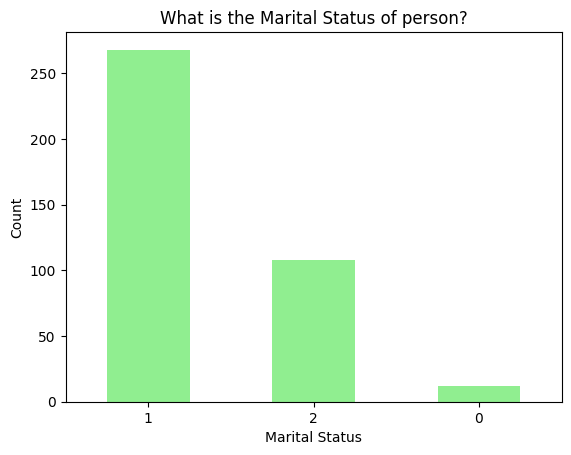

In [30]:
MaritalStatus = data['Marital Status'].value_counts()
MaritalStatus.plot(kind='bar', rot=0, color='lightgreen')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('What is the Marital Status of person?')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


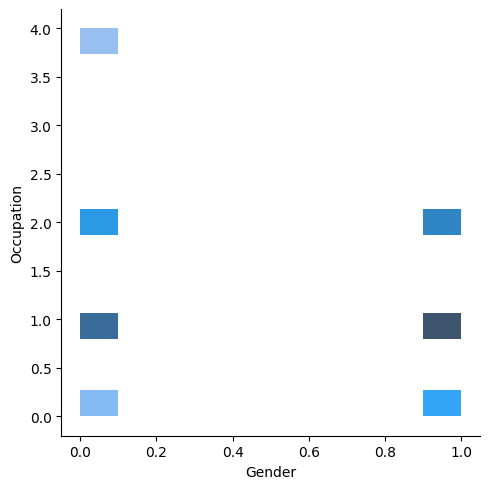

In [31]:
sns.displot(x='Gender', y='Occupation', data=data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


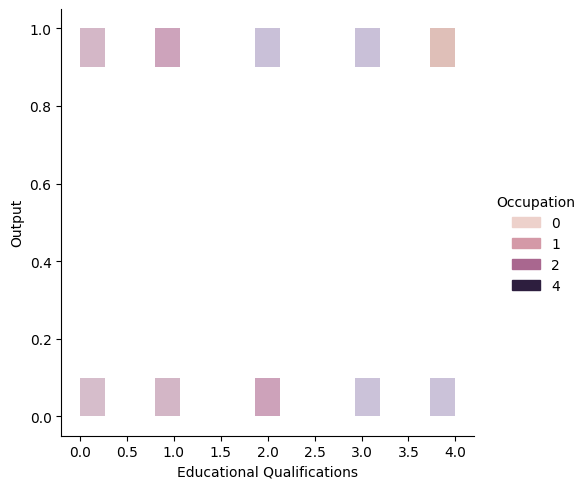

In [32]:
sns.displot(x='Educational Qualifications', y='Output', data=data, hue = 'Occupation')

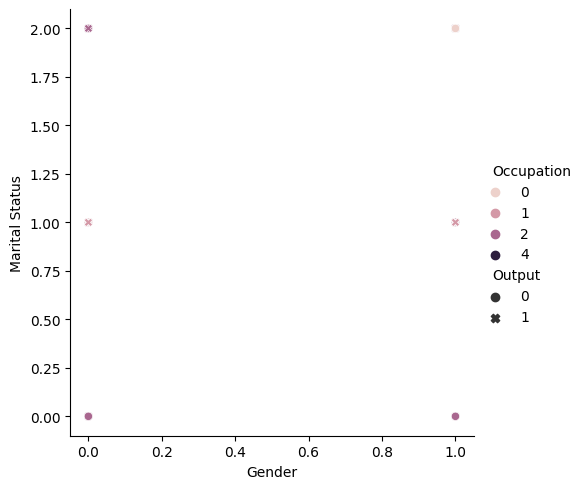

In [33]:
sns.relplot(x='Gender', y='Marital Status', data=data, hue = 'Occupation',style= 'Output')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

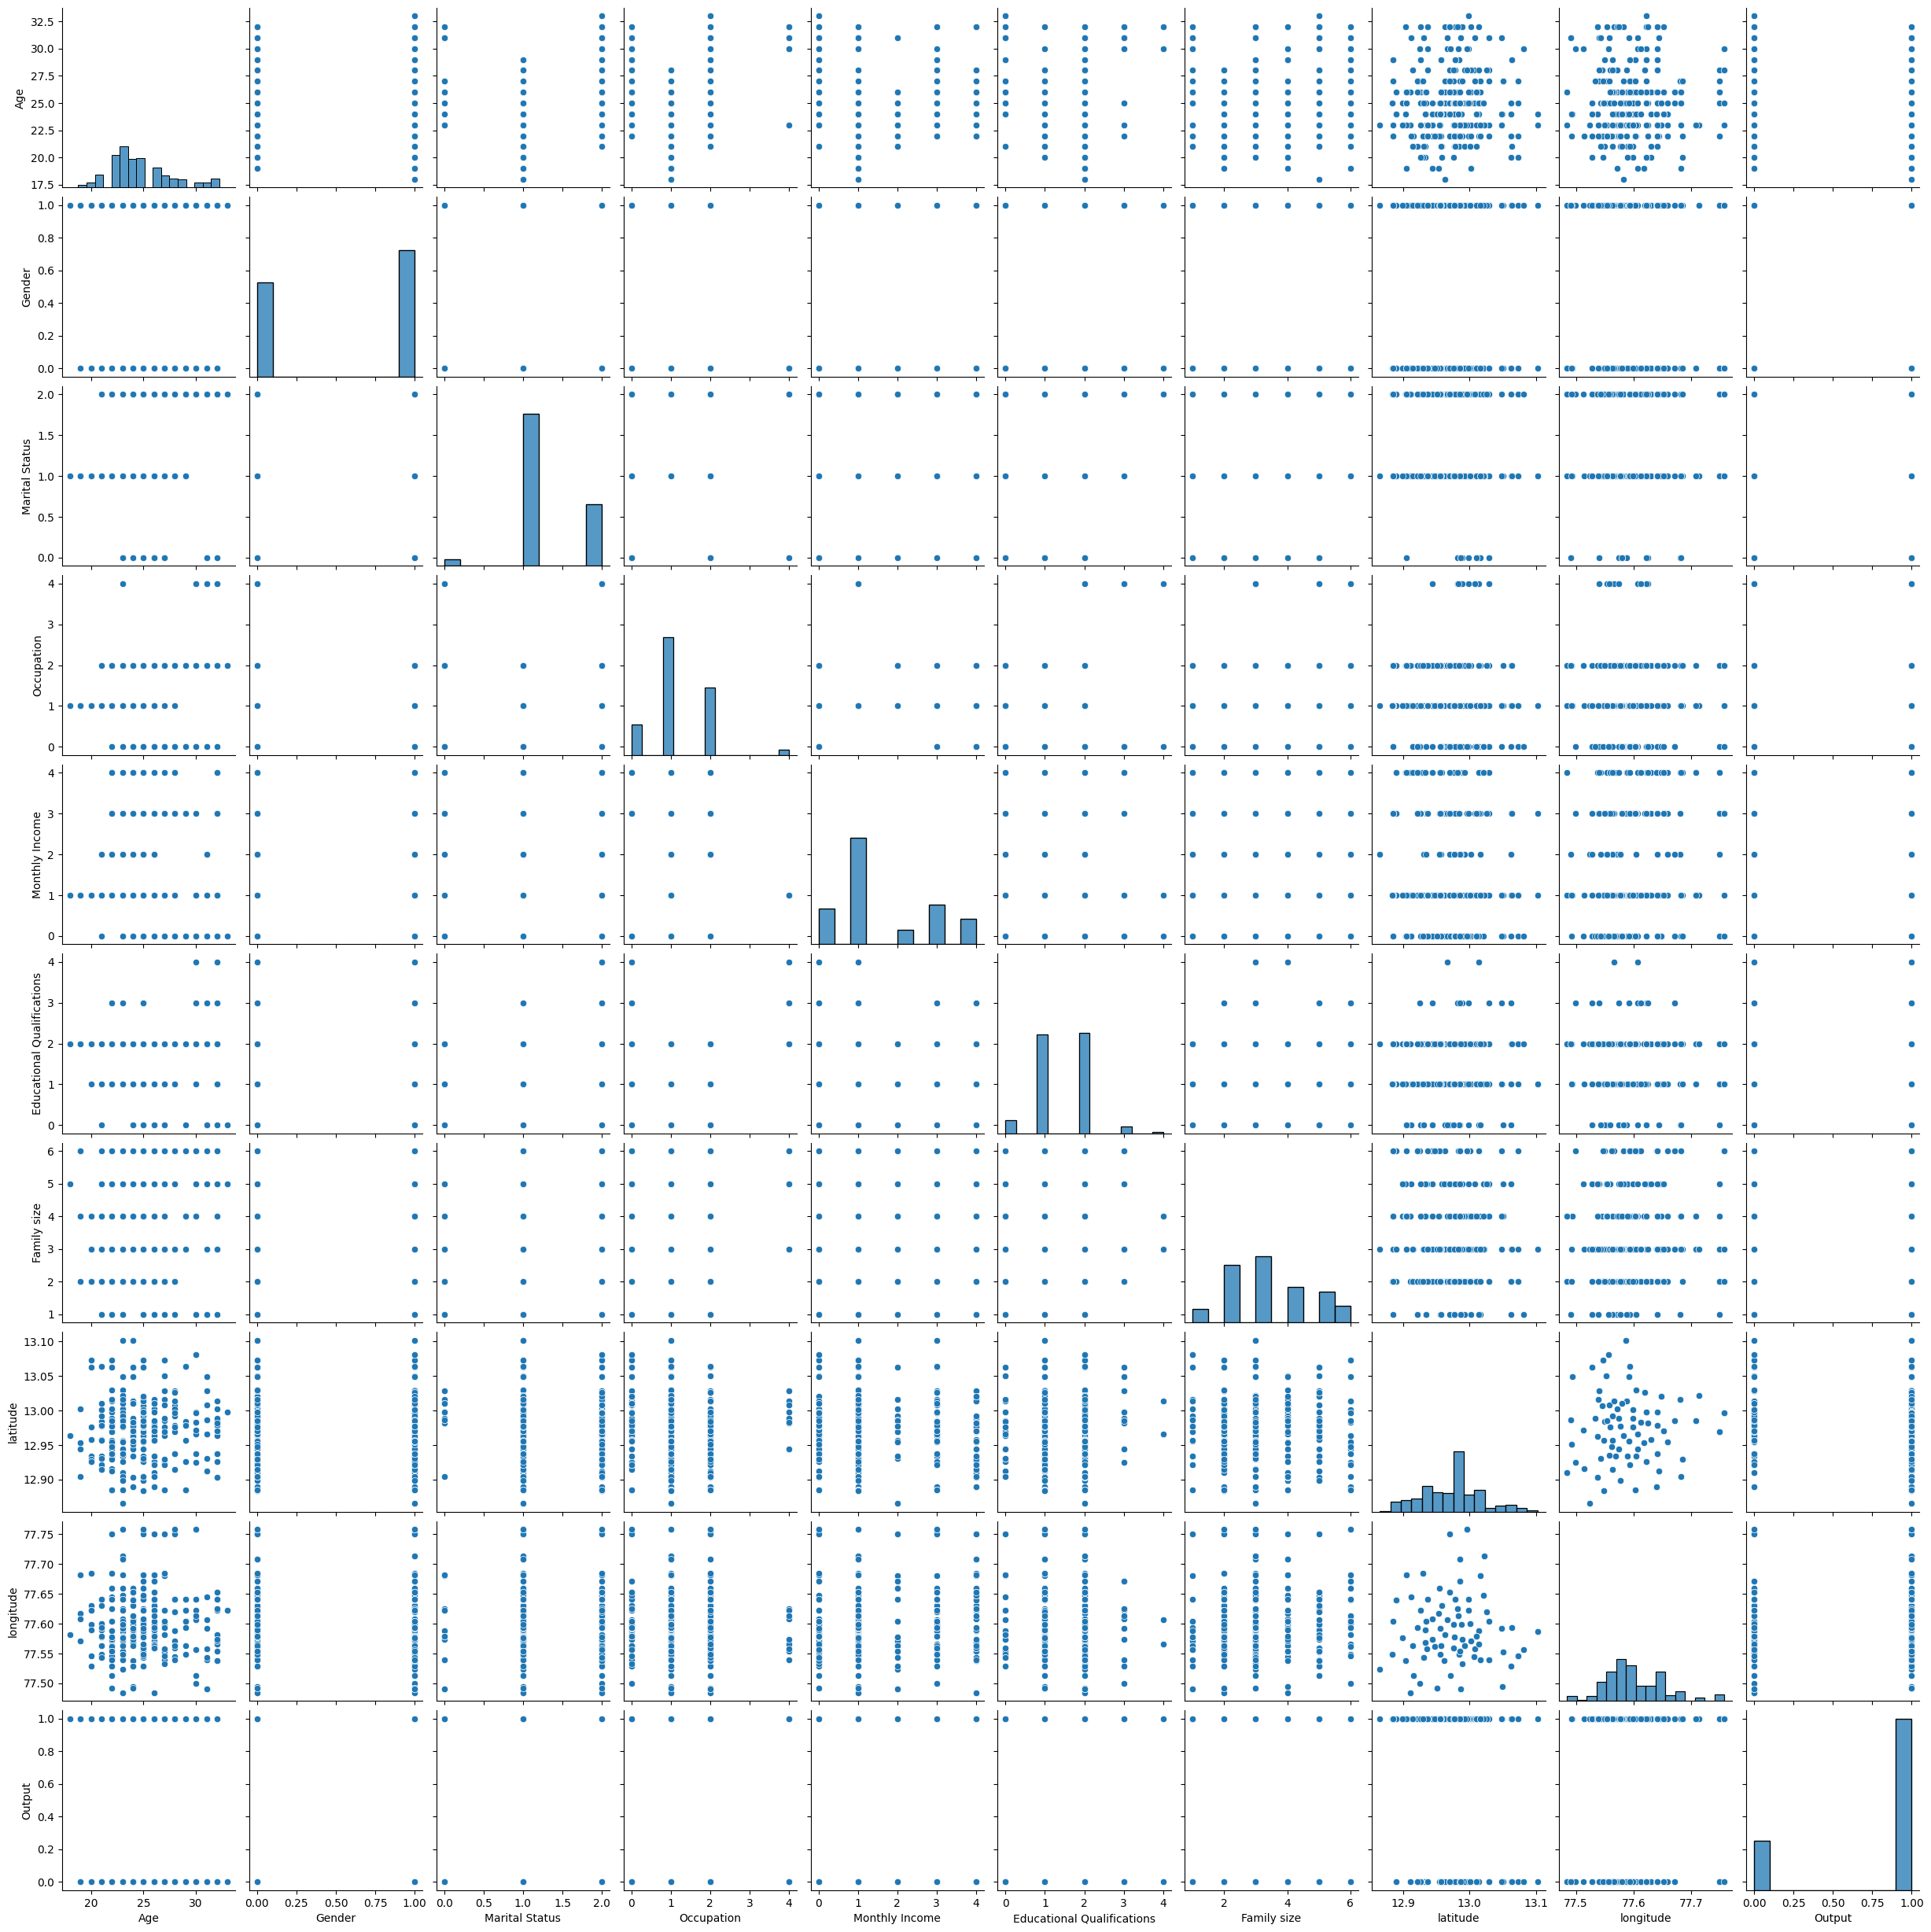

In [34]:
sns.pairplot(data)

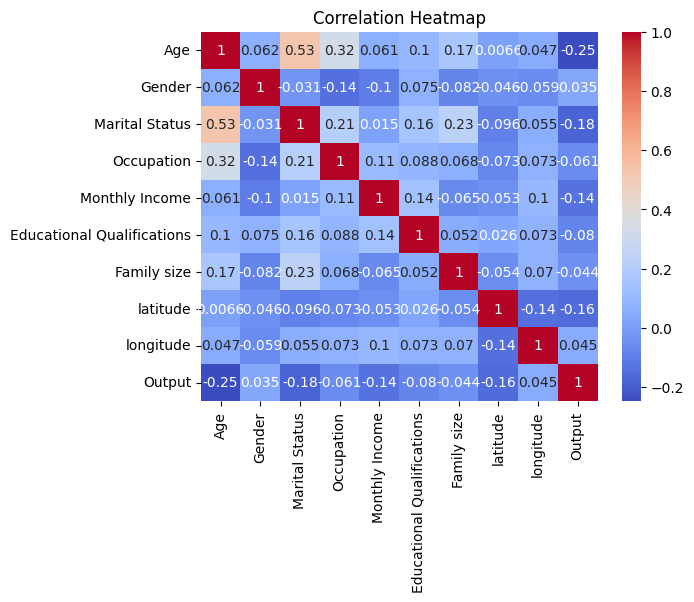

In [35]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Family size', ylabel='Gender'>

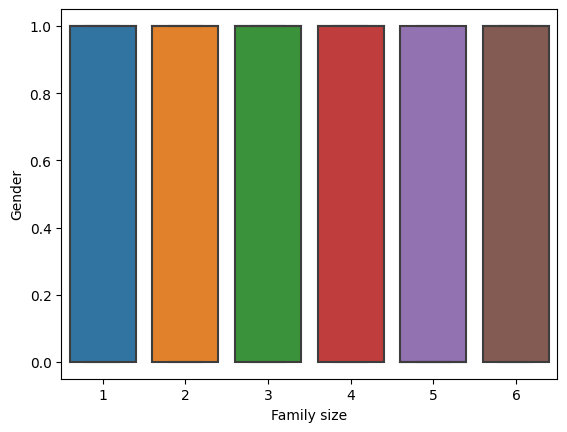

In [36]:
sns.boxplot(x='Family size', y='Gender', data=data)

<Axes: xlabel='Gender', ylabel='Output'>

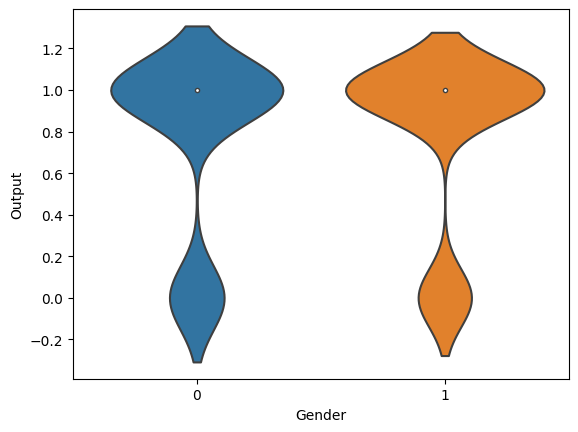

In [37]:
sns.violinplot(x='Gender', y='Output', data=data)

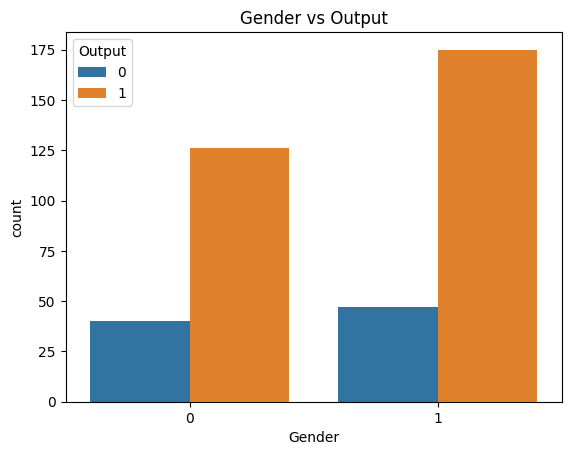

In [38]:
sns.countplot(x='Gender', hue='Output', data=data)
plt.title('Gender vs Output')
plt.show()

this is how we can visualize the data of food. 

thanks :)